In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

model_color = keras.Sequential([
    keras.layers.Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3)),
    #keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), padding='same'),
    #keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), padding='same'),
    #keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(10, activation='softmax')
])

model_color.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_color.summary()

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    fill_mode='nearest'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

lr_reduction = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.2,
    patience=3,
    verbose=1,
    min_lr=0.00001
)

# Assuming train_images, train_labels_1h, test_images, and test_labels_1h are defined elsewhere in your code
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize the images to a range of 0 to 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
train_labels_1h = tf.keras.utils.to_categorical(train_labels, 10)
test_labels_1h = tf.keras.utils.to_categorical(test_labels, 10)

history = model_color.fit(
    datagen.flow(train_images, train_labels_1h, batch_size=32),
    epochs=25,
    validation_data=(test_images, test_labels_1h),
    callbacks=[early_stopping, lr_reduction]
)

c:\Users\msrak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,423,178 (16.87 MB)

 Trainable params: 4,423,178 (16.87 MB)

 Non-trainable params: 0 (0.00 B)

c:\Users\msrak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 79ms/step - accuracy: 0.3725 - loss: 1.6976 - val_accuracy: 0.5808 - val_loss: 1.1815 - learning_rate: 0.0010
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 82ms/step - accuracy: 0.5903 - loss: 1.1500 - val_accuracy: 0.6735 - val_loss: 0.9504 - learning_rate: 0.0010
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 88ms/step - accuracy: 0.6551 - loss: 0.9674 - val_accuracy: 0.7021 - val_loss: 0.8540 - learning_rate: 0.0010
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.6923 - loss: 0.8752 - val_accuracy: 0.7065 - val_loss: 0.8464 - learning_rate: 0.0010
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 80ms/step - accuracy: 0.7185 - loss: 0.8017 - val_accuracy: 0.7460 - val_loss: 0.7479 - learning_rate: 0.0010
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 79ms/step - accuracy: 0.7329 - loss: 0.7593 - val_accuracy: 0.7328 - val_loss: 0.7822 - learning_rate: 0.0010
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step -

313/313 - 4s - 12ms/step - accuracy: 0.8194 - loss: 0.6013

Test accuracy: 0.8194000124931335

Test Loss: 0.6013261675834656
Training history plot saved as 'training_history.png'
Model saved at D:\MCW\Assignment-1\DATA_AUG.keras


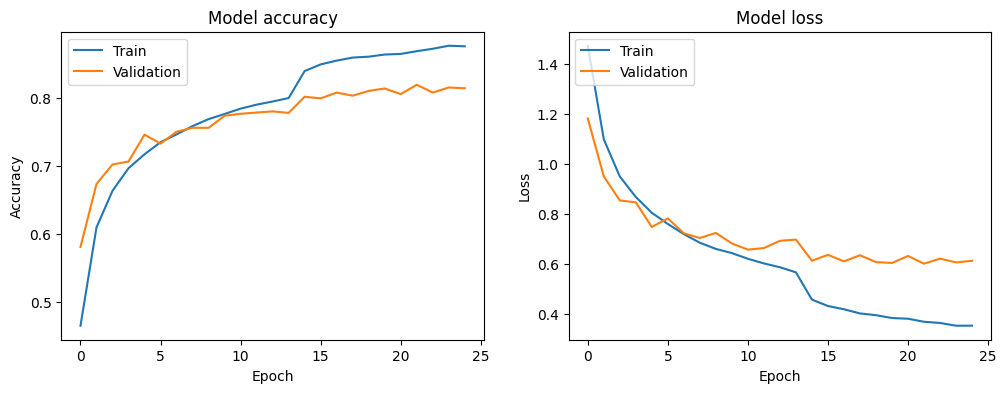

In [3]:
import matplotlib.pyplot as plt

# Evaluate the model
test_loss, test_acc = model_color.evaluate(test_images, test_labels_1h, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest Loss:', test_loss)

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.savefig('training_history.png')
print("Training history plot saved as 'training_history.png'")

model_save_path = r'D:\MCW\Assignment-1\DATA_AUG.keras'
model_color.save(model_save_path)
print(f"Model saved at {model_save_path}")
